In [2]:
# 实例化一个卷积神经网络
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255 
model.compile(optimizer="rmsprop",              
              loss="sparse_categorical_crossentropy",               
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 10s 2ms/step - loss: 0.1582 - accuracy: 0.9504
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0456 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0312 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.0185 - accuracy: 0.9944


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.3f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9903
Test accuracy: 0.990


In [2]:
import os, shutil, pathlib

original_dir = pathlib.Path("../../../train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [13]:
# tf.data.Dataset对象
import numpy as np
import tensorflow as tf
random_rnumbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_rnumbers)
# 数据只会生成单个样本
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break
# 用batch来批量生成数据
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break
# map()方法
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)
(32, 16)
(32, 16)
(32, 16)
(4, 4)
(4, 4)
(4, 4)


In [15]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
tf.Tensor([1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0], shape=(32,), dtype=int32)


In [16]:
callbacks = [
    # 在每轮过后保存模型
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 7s 36ms/step - loss: 0.7329 - accuracy: 0.5095 - val_loss: 0.6924 - val_accuracy: 0.5420
Epoch 2/30
63/63 [==============================] - 1s 22ms/step - loss: 0.7074 - accuracy: 0.5640 - val_loss: 0.6823 - val_accuracy: 0.5850
Epoch 3/30
63/63 [==============================] - 1s 22ms/step - loss: 0.6895 - accuracy: 0.5895 - val_loss: 0.7638 - val_accuracy: 0.5290
Epoch 4/30
63/63 [==============================] - 1s 22ms/step - loss: 0.6433 - accuracy: 0.6420 - val_loss: 0.6283 - val_accuracy: 0.6400
Epoch 5/30
63/63 [==============================] - 1s 22ms/step - loss: 0.6202 - accuracy: 0.6880 - val_loss: 0.5993 - val_accuracy: 0.6810
Epoch 6/30
63/63 [==============================] - 1s 22ms/step - loss: 0.5561 - accuracy: 0.7295 - val_loss: 0.5839 - val_accuracy: 0.6930
Epoch 7/30
63/63 [==============================] - 1s 22ms/step - loss: 0.5030 - accuracy: 0.7600 - val_loss: 0.6528 - val_accuracy: 0.6740
Epoch 8/30
63

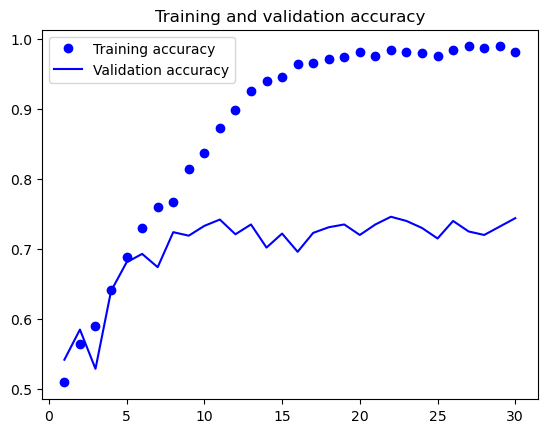

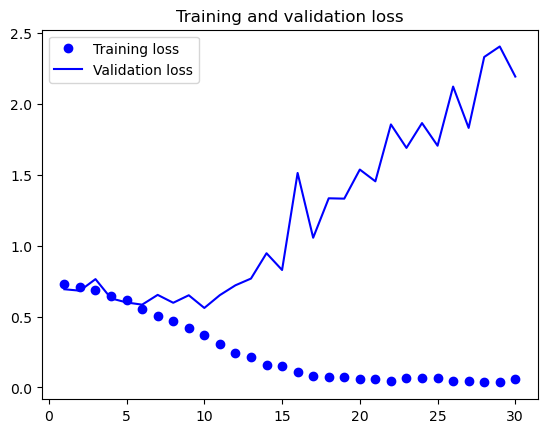

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"] 
val_accuracy = history.history["val_accuracy"] 
loss = history.history["loss"] 
val_loss = history.history["val_loss"] 
epochs = range(1, len(accuracy) + 1) 
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy") 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss") 
plt.legend() 
plt.show()

In [18]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 1s 15ms/step - loss: 0.5870 - accuracy: 0.7120
Test accuracy: 0.712


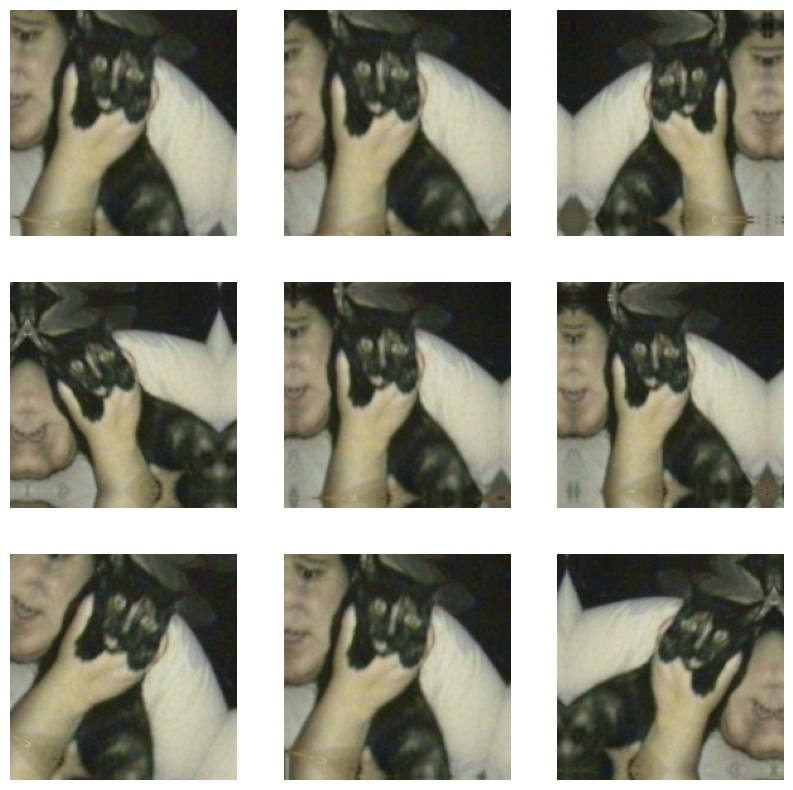

In [23]:
# 数据增强
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)
plt.figure(figsize=(10, 10))
# take(N)表示仅抽取N个批量
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_iamges = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_iamges[0].numpy().astype("uint8"))
        plt.axis('off')

In [32]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",               
              optimizer="rmsprop",               
              metrics=["accuracy"])
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [33]:
callbacks = [
    # 在每轮过后保存模型
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 8s 91ms/step - loss: 0.7585 - accuracy: 0.4895 - val_loss: 0.6917 - val_accuracy: 0.5190
Epoch 2/100
63/63 [==============================] - 6s 87ms/step - loss: 0.6939 - accuracy: 0.5250 - val_loss: 0.6820 - val_accuracy: 0.5390
Epoch 3/100
63/63 [==============================] - 5s 86ms/step - loss: 0.6976 - accuracy: 0.5525 - val_loss: 0.6734 - val_accuracy: 0.5630
Epoch 4/100
63/63 [==============================] - 5s 85ms/step - loss: 0.6782 - accuracy: 0.5950 - val_loss: 0.6738 - val_accuracy: 0.5640
Epoch 5/100
63/63 [==============================] - 5s 85ms/step - loss: 0.6691 - accuracy: 0.6365 - val_loss: 0.6341 - val_accuracy: 0.6470
Epoch 6/100
63/63 [==============================] - 5s 86ms/step - loss: 0.6409 - accuracy: 0.6470 - val_loss: 0.8495 - val_accuracy: 0.5370
Epoch 7/100
63/63 [==============================] - 5s 85ms/step - loss: 0.6210 - accuracy: 0.6700 - val_loss: 0.6303 - val_accuracy: 0.6330
Epoch 

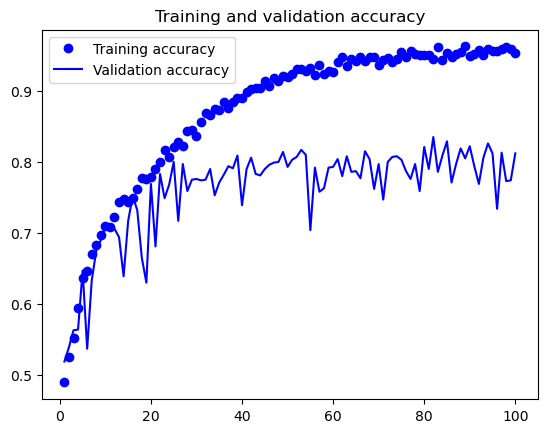

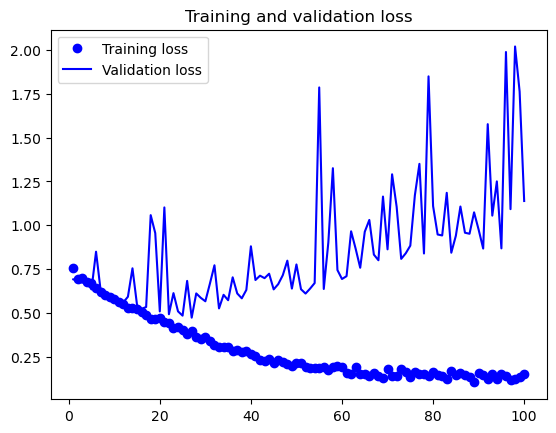

In [35]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"] 
val_accuracy = history.history["val_accuracy"] 
loss = history.history["loss"] 
val_loss = history.history["val_loss"] 
epochs = range(1, len(accuracy) + 1) 
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy") 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss") 
plt.legend() 
plt.show()

In [36]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras") 
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1s 11ms/step - loss: 0.5152 - accuracy: 0.7825
Test accuracy: 0.783


## 使用预训练模型
### 特征提取

In [28]:
# VGG16卷积基实例化
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3)
)

58889256/58889256 [==============================] - 6s 0us/step


In [34]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [37]:
# 提取VGG16的特征和对应的标签
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset) 
val_features, val_labels = get_features_and_labels(validation_dataset) 
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 12ms/step


In [38]:
train_features.shape

(2000, 5, 5, 512)

In [43]:
# 训练Dense层
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
callbacks = [
    # 在每轮过后保存模型
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_vgg16.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20
63/63 [==============================] - 1s 6ms/step - loss: 16.2135 - accuracy: 0.9240 - val_loss: 12.6771 - val_accuracy: 0.9340
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 4.0826 - accuracy: 0.9755 - val_loss: 3.2716 - val_accuracy: 0.9710
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 1.9341 - accuracy: 0.9845 - val_loss: 3.9299 - val_accuracy: 0.9730
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 1.4467 - accuracy: 0.9905 - val_loss: 20.7921 - val_accuracy: 0.9320
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 1.1860 - accuracy: 0.9920 - val_loss: 5.4751 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9965 - val_loss: 5.6459 - val_accuracy: 0.9760
Epoch 7/20
63/63 [==============================] - 0s 2ms/step - loss: 1.0316 - accuracy: 0.9920 - val_loss: 5.1063 - val_accuracy: 0.9740
Epoch 8/20
63/63 

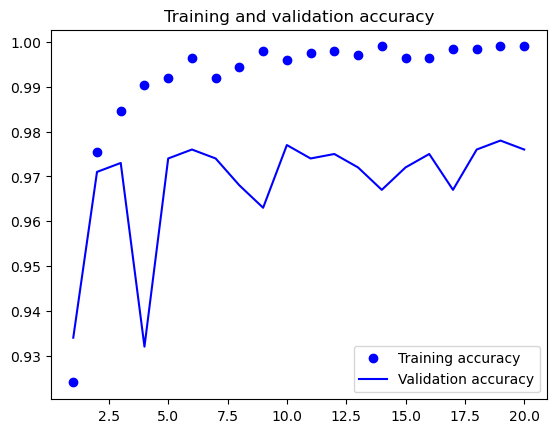

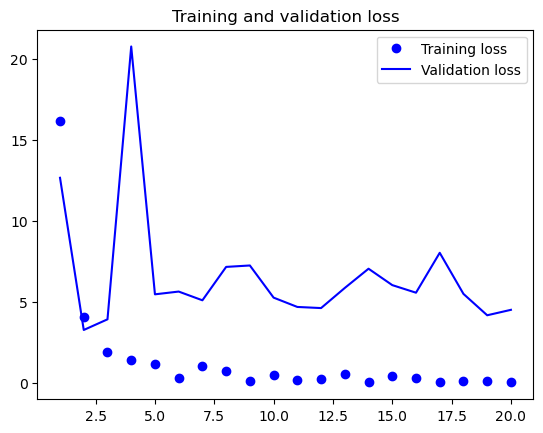

In [44]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"] 
val_acc = history.history["val_accuracy"] 
loss = history.history["loss"] 
val_loss = history.history["val_loss"] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, "bo", label="Training accuracy") 
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy") 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss") 
plt.legend() 
plt.show()

In [49]:
test_model = keras.models.load_model("convnet_from_scratch_with_vgg16.keras") 
loss, accuracy = test_model.evaluate(test_features, test_labels)
print(accuracy)

63/63 [==============================] - 0s 2ms/step - loss: 4.3981 - accuracy: 0.9715
0.9714999794960022


In [50]:
# 冻结卷积基
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False
)
# 清空模型的可训练权重列表
conv_base.trainable = False

In [52]:
conv_base.trainable = True
print("This is the number of trainable weights "           
      "before freezing the conv base:", len(conv_base.trainable_weights))
conv_base.trainable = False
print("This is the number of trainable weights "           
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


In [53]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),         
        layers.RandomRotation(0.1),         
        layers.RandomZoom(0.2),
    ]
)
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [54]:
callbacks = [     
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",         
        save_best_only=True,         
        monitor="val_loss"
    ) 
] 
history = model.fit(     
    train_dataset,     
    epochs=50,     
    validation_data=validation_dataset,     
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 9s 109ms/step - loss: 24.6531 - accuracy: 0.8870 - val_loss: 10.9065 - val_accuracy: 0.9410
Epoch 2/50
63/63 [==============================] - 7s 111ms/step - loss: 6.5532 - accuracy: 0.9435 - val_loss: 5.0629 - val_accuracy: 0.9640
Epoch 3/50
63/63 [==============================] - 7s 107ms/step - loss: 4.0156 - accuracy: 0.9705 - val_loss: 5.8092 - val_accuracy: 0.9690
Epoch 4/50
63/63 [==============================] - 7s 109ms/step - loss: 3.9756 - accuracy: 0.9670 - val_loss: 3.6024 - val_accuracy: 0.9780
Epoch 5/50
63/63 [==============================] - 7s 105ms/step - loss: 4.5995 - accuracy: 0.9600 - val_loss: 4.4834 - val_accuracy: 0.9720
Epoch 6/50
63/63 [==============================] - 7s 105ms/step - loss: 3.3527 - accuracy: 0.9725 - val_loss: 4.3318 - val_accuracy: 0.9720
Epoch 7/50
63/63 [==============================] - 7s 106ms/step - loss: 1.8658 - accuracy: 0.9815 - val_loss: 2.8488 - val_accuracy: 0.9790
Epoc

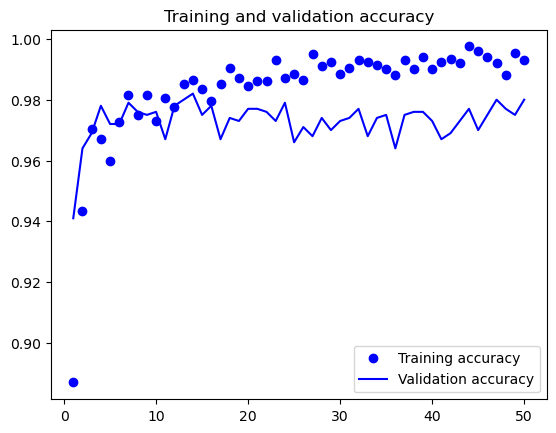

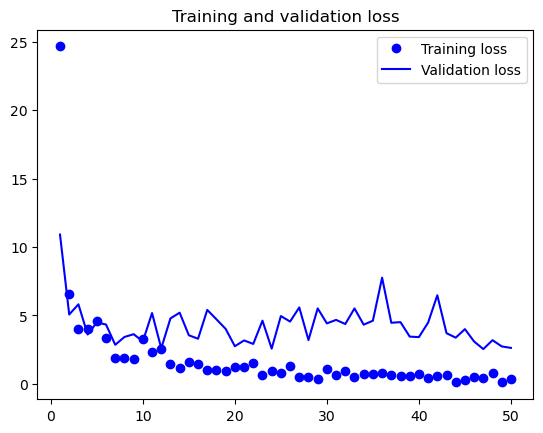

In [55]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"] 
val_acc = history.history["val_accuracy"] 
loss = history.history["loss"] 
val_loss = history.history["val_loss"] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, "bo", label="Training accuracy") 
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy") 
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss") 
plt.legend() 
plt.show()

In [56]:
test_model = keras.models.load_model(     
    "feature_extraction_with_data_augmentation.keras"
) 
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 32ms/step - loss: 5.1896 - accuracy: 0.9715
Test accuracy: 0.971


### 微调预训练模型

In [57]:
# 卷积基的架构
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
# 冻结除最后4层外的所有层
conv_base.trainable = True
for layer in conv_base.layer[:-4]:
    layer.trainable = False

In [58]:
# 微调模型，使用学习率很小的RMSProp优化器
model.compile(loss="binary_crossentropy",               
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),              
              metrics=["accuracy"]) 
callbacks = [     
    keras.callbacks.ModelCheckpoint( 
        filepath="fine_tuning.keras",         
        save_best_only=True,         
        monitor="val_loss"
    ) 
] 
history = model.fit(     
    train_dataset,     
    epochs=30,     
    validation_data=validation_dataset,     
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 9s 108ms/step - loss: 4.1702 - accuracy: 0.9675 - val_loss: 2.5982 - val_accuracy: 0.9810
Epoch 2/30
63/63 [==============================] - 7s 108ms/step - loss: 3.1922 - accuracy: 0.9750 - val_loss: 2.5935 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 7s 106ms/step - loss: 3.7151 - accuracy: 0.9745 - val_loss: 2.5870 - val_accuracy: 0.9820
Epoch 4/30
63/63 [==============================] - 7s 106ms/step - loss: 3.1999 - accuracy: 0.9705 - val_loss: 2.5814 - val_accuracy: 0.9820
Epoch 5/30
63/63 [==============================] - 7s 109ms/step - loss: 2.4789 - accuracy: 0.9740 - val_loss: 2.5855 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 7s 108ms/step - loss: 2.4935 - accuracy: 0.9785 - val_loss: 2.5861 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 7s 106ms/step - loss: 2.8964 - accuracy: 0.9735 - val_loss: 2.5816 - val_accuracy: 0.9810
Epoch 

In [59]:
model = keras.models.load_model("fine_tuning.keras") 
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 2s 33ms/step - loss: 4.6423 - accuracy: 0.9740
Test accuracy: 0.974
